In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

In [3]:
first_date = '2019-01-01'
last_date = '2021-01-01'
raw_data = te.fetchMarkets(symbol=['btcusd:cur', 'ethusd:cur','xrpusd:cur','ltcusd:cur'], initDate=first_date, endDate= last_date, output_type='df')

In [4]:

btcusd = raw_data.loc[raw_data['symbol'] == 'BTCUSD:CUR']
ethusd = raw_data.loc[raw_data['symbol'] == 'ETHUSD:CUR']
xrpusd = raw_data.loc[raw_data['symbol'] == 'XRPUSD:CUR']
ltcusd = raw_data.loc[raw_data['symbol'] == 'LTCUSD:CUR']

btc = btcusd[['close']].rename(columns={'close': 'Bitcoin'})
btc.index.name = 'Date'
eth = ethusd[['close']].rename(columns={'close': 'Ethereum'})
eth.index.name = 'Date'
xrp = xrpusd[['close']].rename(columns={'close': 'XRP'})
xrp.index.name = 'Date'
ltc = ltcusd[['close']].rename(columns={'close': 'Litecoin'})
ltc.index.name = 'Date'

df = pd.merge(pd.merge(pd.merge(btc,eth, on='Date'),xrp, on='Date'),ltc, on ='Date')
df = df.loc[[first_date, last_date]]
df.loc['Growth Rate(%)']= round((((df.iloc[1]-df.iloc[0])*100)/ df.iloc[0]),0)
df

,Bitcoin,Ethereum,XRP,Litecoin
Date,,,,
2019-01-01 00:00:00,3823.44,138.64,0.3617,31.59
2021-01-01 00:00:00,29402.64,730.94,0.2355,126.24
Growth Rate(%),669.00,427.00,-35.0000,300.00


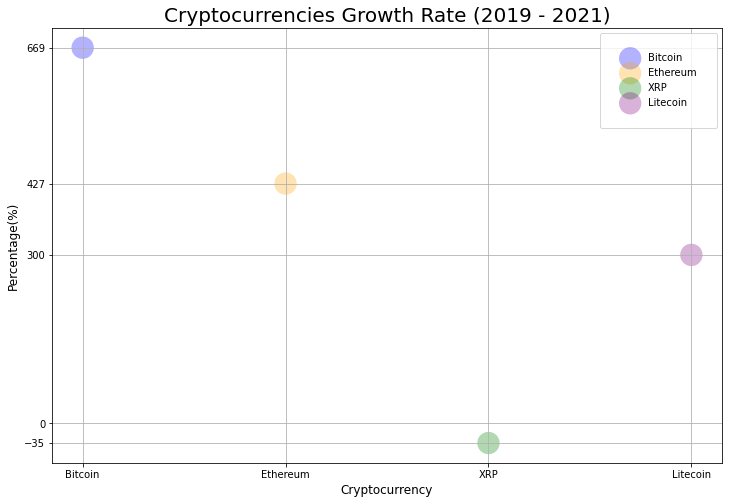

In [5]:

names = list(df.keys())
values = list(df.iloc[2])
colors = ['blue', 'orange','green','purple']

fig, axs = plt.subplots( figsize=(12, 8), sharey=True)

for index in range(len(names)):
    axs.scatter(names[index], values[index], c=colors[index], s=500, label=names[index],
               alpha=0.3, edgecolors='none')

plt.title("Cryptocurrencies Growth Rate (2019 - 2021)", size=20)
plt.yticks(list(df.iloc[2]) + [0])
axs.set_xlabel('Cryptocurrency', size=12)
axs.set_ylabel('Percentage(%)', size=12)
axs.legend(borderpad=2)
plt.grid()